Understanding the objective:




The goal is to predict the salary of data-related positions based on location, company review, and job title


Import datasets:

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving 1-df.csv to 1-df.csv


Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import pickle

Read the data

In [ ]:
df_raw =pd.read_csv('1-df.csv')

Data Understanding

In [ ]:
df_raw.head()

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),3.5,Hopper\n3.5,"New York, NY",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),4.5,Noom US\n4.5,"New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable
2,Data Science Manager,$111K-$181K (Glassdoor est.),-1.0,Decode_M,"New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable
3,Data Analyst,$111K-$181K (Glassdoor est.),3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable
4,"Director, Data Science",$111K-$181K (Glassdoor est.),3.4,United Entertainment Group\n3.4,"New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable


The task I should do in this stage by seeing this data:


1- job title categorized by director, data science,...


2- Min and Max salaries can be extracted from the salary estimate and then averaged to create a new average salary column which is our response variable.


3- The company name does not matter to us


4- the state which is the location of the position can be extracted from the location column


5- so many unknowns from the revenue, so we do not use this column.

Assess Data

I am checking the raw data to understand the type of data I am dealing with.

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5892 entries, 0 to 5891
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          5892 non-null   object 
 1   Salary Estimate    5892 non-null   object 
 2   Rating             5892 non-null   float64
 3   Company Name       5892 non-null   object 
 4   Location           5892 non-null   object 
 5   Size               5892 non-null   object 
 6   Founded            5892 non-null   object 
 7   Type of ownership  5892 non-null   object 
 8   Industry           5892 non-null   object 
 9   Sector             5892 non-null   object 
 10  Revenue            5892 non-null   object 
dtypes: float64(1), object(10)
memory usage: 506.5+ KB


Clean Data

1- create min and max salary columns for the positions and parse the corresponding value out of the raw data

2- creat average salary column

3- extracted the state where the positions are located. creat a state column

4- A title column was created to show the different categories for the posted roles, such as data engineer , deep learning , analyst

In [ ]:
#remove instances without salary estimates
df = df_raw[df_raw['Salary Estimate'] != '-1']

In [ ]:
#remove per hour salary
df = df[~df['Salary Estimate'].str.contains('Per Hour')]

In [ ]:
#remove $
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.replace('$',' '))

In [ ]:
#remove K
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.replace('K',' '))

In [ ]:
#split it
df['Salary Estimate']=df['Salary Estimate'].apply(lambda x:x.split())

In [ ]:
df['Min_salary'] = df['Salary Estimate'].apply(lambda x: x[0])
df['Max_salary'] = df['Salary Estimate'].apply(lambda x:x[2])

In [ ]:
#cast Min_salary and Max_salary to int and get the average salary
df['Min_salary']= df['Min_salary'].apply(lambda x:int(x))
df['Max_salary']= df['Max_salary'].apply(lambda x:int(x))
df['Average_salary'] = (df.Min_salary + df.Max_salary)/2

In [ ]:
# state of the job
df['State'] = df['Location'].apply (lambda x: x.split()[-1])
df = df[df.State != 'Kingdom'] #remove united kingdom

In [ ]:
def title_organizer(x):
  """
  this function organizes the job title
  """
  x = x.lower()
  if ('data scientist' in x ) or ('data science' in x):
    return 'data scientist'
  elif 'data engineer' in x:
    return 'data engineer'
  elif 'deep learning' in x:
    return 'deep learning engineer'
  elif 'machine learning' in x:
    return 'machine learning engineer'
  elif 'director' in x:
    return 'director'
  elif 'manager' in x:
    return 'manager'
  elif 'analyst' in x:
    return 'analyst'
  elif 'resercher' in x:
    return 'researcher'
  else:
    return 'other'

In [ ]:
df['Job Title'] = df['Job Title']. apply(title_organizer)

In [ ]:
df = df[df['Rating']!=-1]

In [ ]:
cleaned_df = df[['Job Title', 'Rating', 'Average_salary', 'State']]

In [ ]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4891 entries, 0 to 5887
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Job Title       4891 non-null   object 
 1   Rating          4891 non-null   float64
 2   Average_salary  4891 non-null   float64
 3   State           4891 non-null   object 
dtypes: float64(2), object(2)
memory usage: 191.1+ KB


Exploratory Data Aanalysis (EDA)

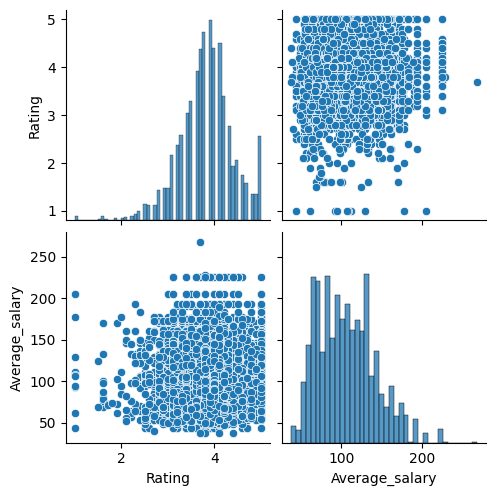

In [ ]:
sns.pairplot(cleaned_df)

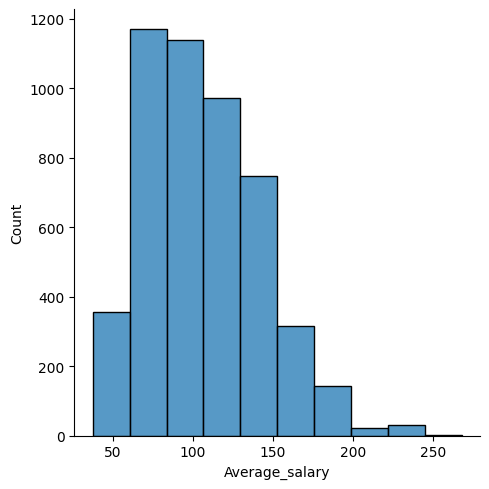

In [ ]:
sns.displot(x='Average_salary', data=cleaned_df, bins=10)

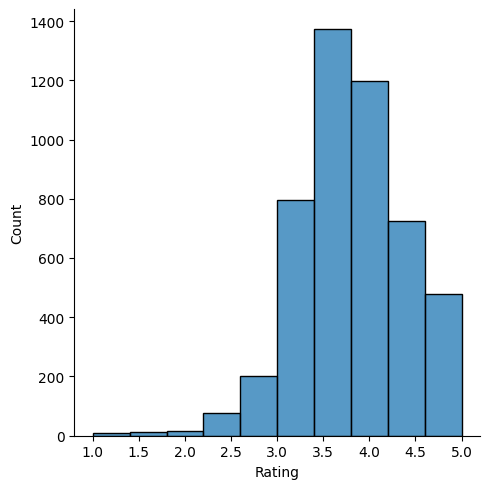

In [ ]:
sns.displot(x='Rating', data=cleaned_df, bins=10)

<Axes: xlabel='Rating', ylabel='Average_salary'>

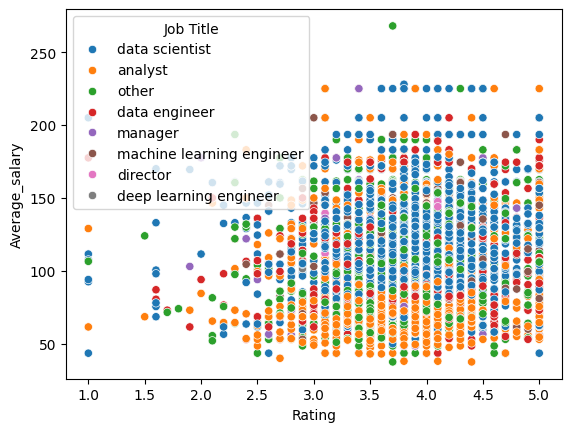

In [ ]:
sns.scatterplot(x='Rating', y='Average_salary', data=cleaned_df, hue='Job Title')

Feature Engineering:

In [ ]:
preprocessed_df=pd.get_dummies(cleaned_df, columns=['Job Title', 'State'])

In [ ]:
x = preprocessed_df.drop(columns='Average_salary')
y = preprocessed_df['Average_salary']

Modeling:

In [ ]:
x_train,x_test,y_train, y_test= train_test_split(x,y,test_size= 0.4,random_state=101)

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
#prediction
predictions = lr.predict(x_test)
predictions


array([ 92.96158603, 124.44641081,  90.13581966, ...,  83.52678229,
        91.99962073,  92.43573791])

<Axes: xlabel='Average_salary'>

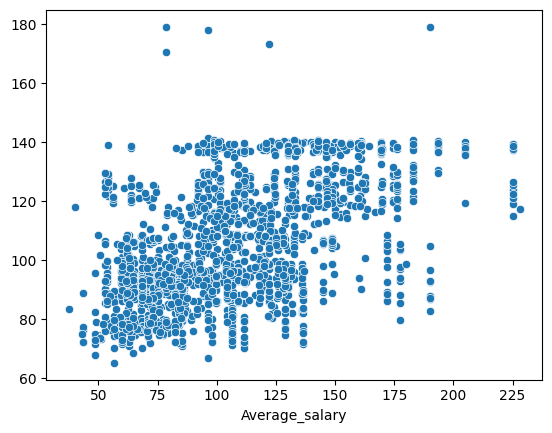

In [ ]:
sns.scatterplot(x=y_test,y=predictions)

In [ ]:
print ('MAE:',mean_absolute_error(y_test , predictions))

MAE: 23.687249702050124


Save the model:

In [ ]:
pickle.dump(lr, open('Salary_Estimate.pkl', 'wb'))